## Import libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix, classification_report

## Import dataset

In [42]:
df = pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv')

## Exploratory data analysis

In [43]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [44]:
df.shape

(1727, 7)

#### Rename column names
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [45]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [46]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variables.

In [48]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts()) 

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

#### Summary of variables
- There are 7 variables in the dataset. All the variables are of categorical data type.
- These are given by buying, maint, doors, persons, lug_boot, safety and class.
- class is the target variable.

#### Explore class variable

In [49]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [50]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

## Declare feature vector and target variable

In [51]:
X = df.drop(['class'], axis=1)

y = df['class']

## Split data into separate training and test set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [53]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

## Feature Engineering

__Feature Engineering__ is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [54]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

#### Encode categorical variables

In [55]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


We can see that all the variables are ordinal categorical data type.

In [56]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low


In [57]:
# import category encoders

import category_encoders as ce

In [58]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [59]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [60]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3


We now have training and test set ready for model building.

## Decision Tree Classifier with criterion gini index

In [61]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [62]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [63]:
'''
Gini impurity is a measure of how often a randomly chosen element would be incorrectly classified.

The maximum depth of the tree. The tree will be grown until it reaches this depth, 
and then the growing process will stop. This is a hyperparameter that controls the complexity of the decision tree and helps prevent overfitting.
'''

'\nGini impurity is a measure of how often a randomly chosen element would be incorrectly classified.\n\nThe maximum depth of the tree. The tree will be grown until it reaches this depth, \nand then the growing process will stop. This is a hyperparameter that controls the complexity of the decision tree and helps prevent overfitting.\n'

#### Predict the Test set results with criterion gini index

In [64]:
y_pred_gini = clf_gini.predict(X_test)

#### Check accuracy score with criterion gini index

In [65]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.8150


Here, __y_test__ are the true class labels and __y_pred_gini__ are the predicted class labels in the test-set

#### Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [66]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [67]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8013


#### Check for overfitting and underfitting

In [68]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8013
Test set score: 0.8150


Here, the training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8150. These two values are quite comparable. So, there is no sign of overfitting.

#### Visualize decision-trees

[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.634\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.5, 0.125, 'gini = 0.458\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

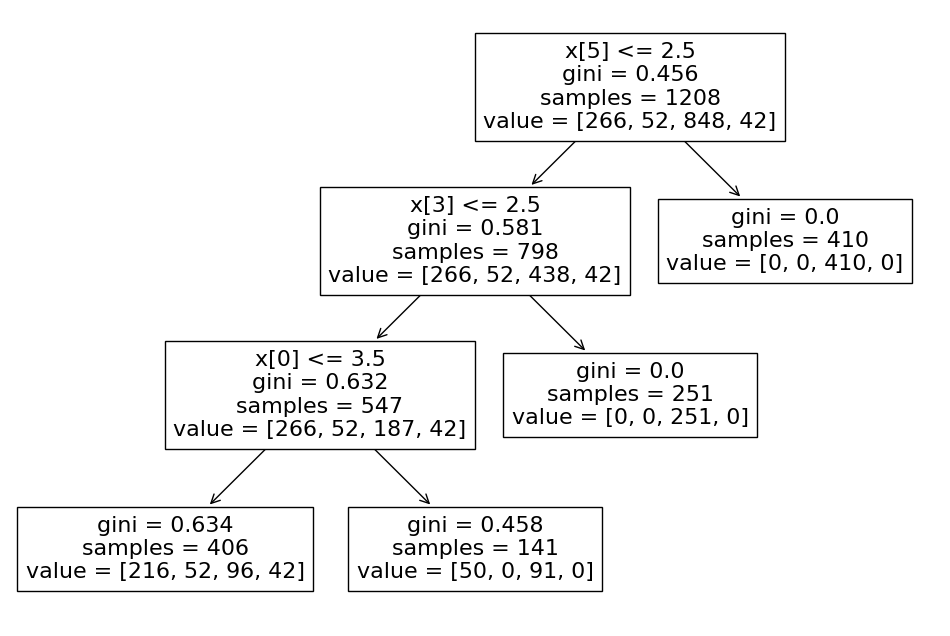

In [69]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

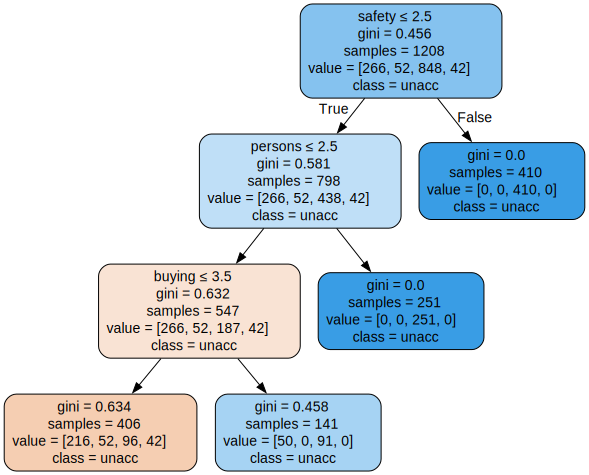

In [70]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

## Decision Tree Classifier with criterion entropy

In [71]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### Predict the Test set results with criterion entropy

In [72]:
y_pred_en = clf_en.predict(X_test)

#### Check accuracy score with criterion entropy

In [73]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8150


#### Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [74]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [75]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8013


#### Check for overfitting and underfitting

In [76]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8013
Test set score: 0.8150


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8150. These two values are quite comparable. So, there is no sign of overfitting.

#### Visualize decision-trees

[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\nentropy = 1.203\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\nentropy = 1.484\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 3.5\nentropy = 1.642\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.695\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.5, 0.125, 'entropy = 0.938\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

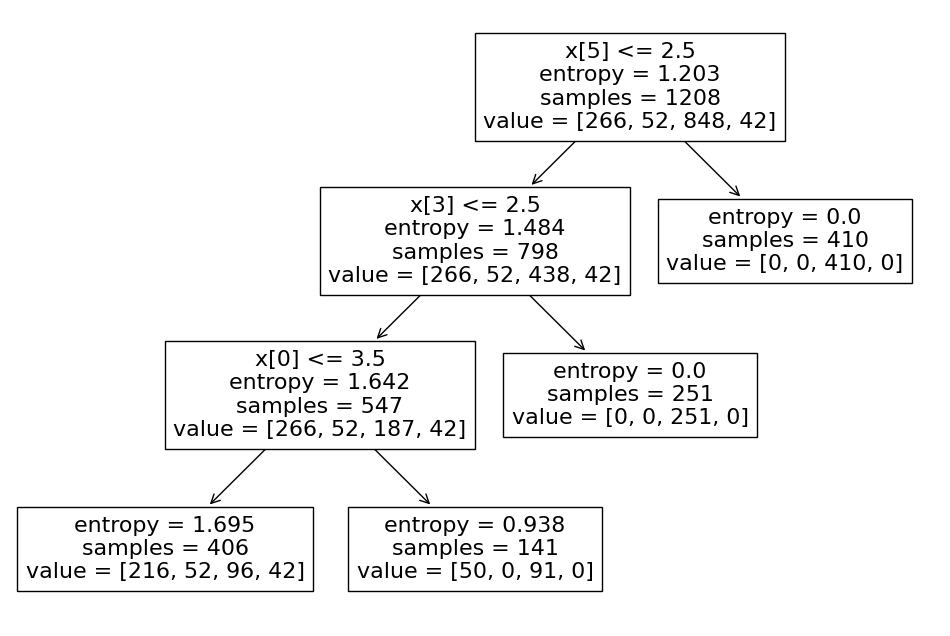

In [77]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

#### Visualize decision-trees with graphviz

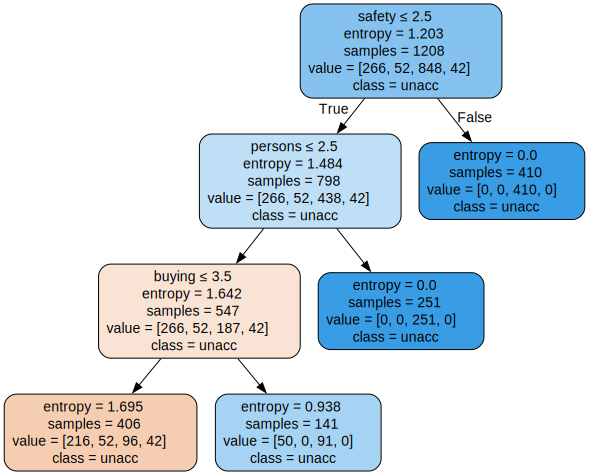

In [78]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called __Confusion matrix__ that comes to our rescue.

## Confusion matrix

In [79]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 96   0  22   0]
 [ 17   0   0   0]
 [ 34   0 327   0]
 [ 23   0   0   0]]


## Classification Report

Classification report is another way to evaluate the classification model performance. It displays the __precision__, __recall__, __f1__ and __support__ scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.81      0.67       118
        good       0.00      0.00      0.00        17
       unacc       0.94      0.91      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.82       519
   macro avg       0.38      0.43      0.40       519
weighted avg       0.78      0.82      0.79       519



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Results and conclusion


- In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.801.
- In the model with criterion gini index, the training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8150. These two values are quite comparable. So, there is no sign of overfitting.
- Similarly, in the model with criterion entropy, the training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8150.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
- In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
- The confusion matrix and classification report yields very good model performance.